# **Modelling and Evaluation: Regression**

## Objectives

1. Fit and evaluate a regression model which will predict house prices.
2. Answers business criteria 2. Predict prices for client house data.
3. We have agreed an R2 score of at least 0.75 on the train set as well as on the test set.
4. Can predict house prices based on input data from streamlit dashboard. 

## Inputs

1. House_prices_records_clean.csv
2. Inherited_houses_clean.csv
3. Findings of feature engineering notebook

## Outputs

1. Data sets for train, validate and test sets.
2. Feature engineering pipeline.
3. Trained Model.
4. Predictions for client house prices and supporting data.



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing'

# Load data

Note that we are using the cleaned data sets from the clean data notebook.

In [4]:
import numpy as np
import pandas as pd

house_prices_clean_df = pd.read_csv(f"outputs/datasets/clean_data/House_prices_records_clean.csv")
inherited_houses_clean_df = pd.read_csv(f"outputs/datasets/clean_data/Inherited_houses_clean.csv")

In [5]:
house_prices_clean_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


In [6]:
inherited_houses_clean_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,730.0,Unf,1961.0,...,TA,11622,80.0,0.0,0,6,5,882.0,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,312.0,Unf,1958.0,...,Gd,14267,81.0,108.0,36,6,6,1329.0,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,482.0,Fin,1997.0,...,TA,13830,74.0,0.0,34,5,5,928.0,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,470.0,Fin,1998.0,...,Gd,9978,78.0,20.0,36,6,6,926.0,1998,1998


---

# Split data

We need to split our house price data into train, validate and test sets. We will follow the conventional ration of 7:1:2,

First we split into train and test sets.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(
                                    house_prices_clean_df.drop(['SalePrice'],axis=1),
                                    house_prices_clean_df['SalePrice'],
                                    test_size=0.2,
                                    random_state=0
                                    )

print("* Train set:", X_train.shape, y_train.shape, "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (1168, 21) (1168,) 
* Test set: (292, 21) (292,)


Then we split the test set again. We set the ratio to 0.2 as we want an overall proportion of 7:1:2.

In [8]:
X_train, X_val,y_train, y_val = train_test_split(
                                    X_train,
                                    y_train,
                                    test_size=0.2,
                                    random_state=0
                                    )

print("* Train set:", X_train.shape, y_train.shape)
print("* Validation set:",  X_val.shape, y_val.shape)
print("* Test set:",   X_test.shape, y_test.shape)

* Train set: (934, 21) (934,)
* Validation set: (234, 21) (234,)
* Test set: (292, 21) (292,)


---

# Pipeline

We apply the feature engineering steps outlined in the notebook

In [9]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropFeatures
from feature_engine.encoding import OrdinalEncoder
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler



pipeline = Pipeline([
    ('drop_features', DropFeatures(features_to_drop = ['1stFlrSF',
                                                        '2ndFlrSF',
                                                        'GarageArea',
                                                        'GarageYrBlt',
                                                        'YearBuilt']) ),

    ("OrdinalCategoricalEncoder",OrdinalEncoder(encoding_method='arbitrary', 
                                                  variables = ['BsmtExposure',
                                                               'BsmtFinType1',
                                                               'GarageFinish',
                                                               'KitchenQual'] ) ),

    ('pt', vt.PowerTransformer(variables = ['BedroomAbvGr',
                                            'BsmtFinSF1',
                                            'BsmtUnfSF',
                                            'GrLivArea',
                                            'LotArea',
                                            'LotFrontage',
                                            'MasVnrArea',
                                            'OpenPorchSF',
                                            'OverallCond',
                                            'OverallQual',
                                            'TotalBsmtSF',
                                            'YearRemodAdd']) ),

    ('winsorizer_iqr', Winsorizer(capping_method='iqr', fold=1.5, tail='both')),
    
    ( "feat_scaling",StandardScaler() )
  ])

We can then fit our train, validate and test sets with the pipeline.

In [10]:
X_train = pipeline.fit_transform(X_train)
X_val= pipeline.transform(X_val)
X_test = pipeline.transform(X_test)

---

# The Model

In [11]:
import os;
import tensorflow as tf;
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2';
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_tf_model(n_features):

  model = Sequential()
  model.add(Dense(units=n_features, activation='relu', input_shape=(n_features,)))

  model.add(Dense(units=8,activation='relu'))
  model.add(Dropout(0.25))

  model.add(Dense(units=4,activation='relu'))
  model.add(Dropout(0.25))

  model.add(Dense(units=1))
  model.compile(loss='mse', optimizer='adam')
  
  return model

In [12]:
model = create_tf_model(n_features=X_train.shape[1])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_1 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 449
Trainable params: 449
Non-trainable params: 0
__________________________________________________________

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [14]:
model = create_tf_model(n_features=X_train.shape[1])

model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_val, y_val),
          verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
30/30 [==============================] - 0s 5ms/step - loss: 39276228608.0000 - val_loss: 37143080960.0000
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 39276101632.0000 - val_loss: 37142929408.0000
Epoch 3/100
30/30 [==============================] - 0s 971us/step - loss: 39275835392.0000 - val_loss: 37142478848.0000
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 39275290624.0000 - val_loss: 37141762048.0000
Epoch 5/100
30/30 [==============================] - 0s 885us/step - loss: 39274582016.0000 - val_loss: 37140795392.0000
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 39273451520.0000 - val_loss: 37139394560.0000
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 39271759872.0000 - val_loss: 37137248256.0000
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 39268995072.0000 - val_loss: 37134032896.0000
Epoch 9/100
30/30 [=========================

---

# Evaluation

In [15]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,3.927623e+10,3.714308e+10
1,3.927610e+10,3.714293e+10
2,3.927584e+10,3.714248e+10
3,3.927529e+10,3.714176e+10
4,3.927458e+10,3.714080e+10
...,...,...
95,1.198142e+10,6.509827e+09
96,1.236553e+10,6.464874e+09
97,1.233047e+10,6.432071e+09
98,1.191520e+10,6.381816e+09


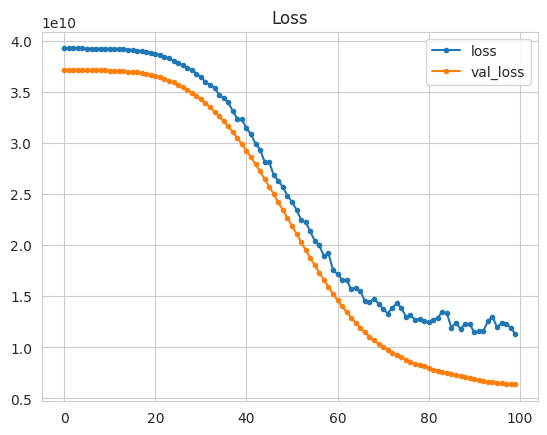

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.show()

In [18]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 501us/step - loss: 7387159552.0000


7387159552.0

In [19]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
import numpy as np

def regression_performance(X_train, y_train,
                           X_val, y_val,
                           X_test, y_test,pipeline):

  print("Model Evaluation \n")
  print("* Train Set")
  regression_evaluation(X_train,y_train,pipeline)
  print("* Validation Set")
  regression_evaluation(X_val, y_val,pipeline)
  print("* Test Set")
  regression_evaluation(X_test,y_test,pipeline)



def regression_evaluation(X,y,pipeline):
  """
  # Gets features and target (either from train or test set) and pipeline
  - it predicts using the pipeline and the features
  - calculates performance metrics comparing the prediction to the target
  """
  prediction = pipeline.predict(X)
  print('R2 Score:', r2_score(y, prediction).round(3))  
  print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))  
  print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))  
  print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, prediction)).round(3))
  print("\n")

  

def regression_evaluation_plots(X_train, y_train,
                                X_val, y_val,
                                X_test, y_test,
                                pipeline, alpha_scatter=0.5):

  pred_train = pipeline.predict(X_train).reshape(-1) 
  # we reshape the prediction arrays to be in the format (n_rows,), so we can plot it after
  pred_val = pipeline.predict(X_val).reshape(-1)
  pred_test = pipeline.predict(X_test).reshape(-1)

  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
  sns.scatterplot(x=y_train , y=pred_train, alpha=alpha_scatter, ax=axes[0])
  sns.lineplot(x=y_train , y=y_train, color='red', ax=axes[0])
  axes[0].set_xlabel("Actual")
  axes[0].set_ylabel("Predictions")
  axes[0].set_title("Train Set")

  sns.scatterplot(x=y_val , y=pred_val, alpha=alpha_scatter, ax=axes[1])
  sns.lineplot(x=y_val , y=y_val, color='red', ax=axes[1])
  axes[1].set_xlabel("Actual")
  axes[1].set_ylabel("Predictions")
  axes[1].set_title("Validation Set")

  sns.scatterplot(x=y_test , y=pred_test, alpha=alpha_scatter, ax=axes[2])
  sns.lineplot(x=y_test , y=y_test, color='red', ax=axes[2])
  axes[2].set_xlabel("Actual")
  axes[2].set_ylabel("Predictions")
  axes[2].set_title("Test Set")

  plt.show()

Model Evaluation 

* Train Set
R2 Score: -0.086
Mean Absolute Error: 69965.277
Mean Squared Error: 6862837223.786
Root Mean Squared Error: 82842.243


* Validation Set
R2 Score: -0.16
Mean Absolute Error: 67090.981
Mean Squared Error: 6364904165.02
Root Mean Squared Error: 79780.349


* Test Set
R2 Score: -0.07
Mean Absolute Error: 69824.564
Mean Squared Error: 7387159375.072
Root Mean Squared Error: 85948.586




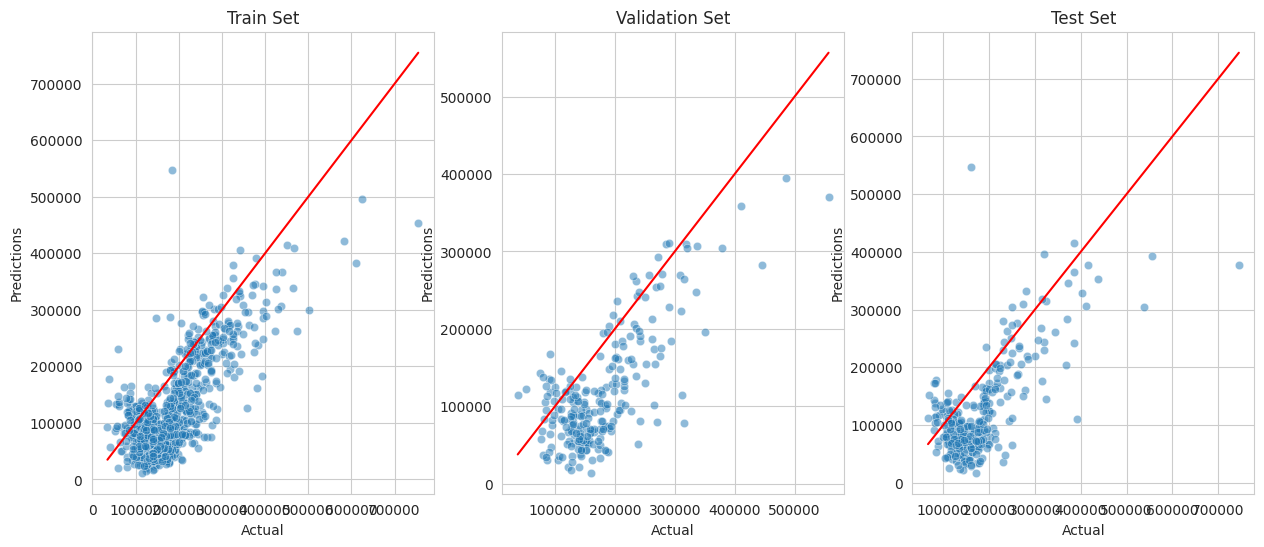

In [20]:
regression_performance(X_train, y_train,X_val, y_val, X_test, y_test,model)
regression_evaluation_plots(X_train, y_train, X_val, y_val,X_test, y_test, 
                            model, alpha_scatter=0.5)

---

# Predict house prices

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
